# 2. Quasi Monte Carlo Methods

## 2.1 Key Concept and first Example

Quasi-Monte Carlo (QMC) methods use **deterministic** number sequences, known as **low-discrepancy sequences**, instead of random sampling to achieve faster convergence rates. These sequences are designed to cover the sample space more uniformly than purely random samples. One common low-discrepancy sequence is the **Sobol sequence**.

We consider the problem from before, i.e., the estimation of the integral

$$ \int_0^1 \sin(2\pi x) dx. $$

In the following, we use the `scipy.stats.qmc` module to generate Sobol sequence samples and compare them to the standard Monte Carlo (MC) method. A small sample size $ N = 512 $ is used to demonstrate the improvement of using QMC instead of MC.

Monte Carlo mean: 0.06068075267856876
Quasi-Monte Carlo mean: 4.5680476002188386e-07
Expected mean: 0


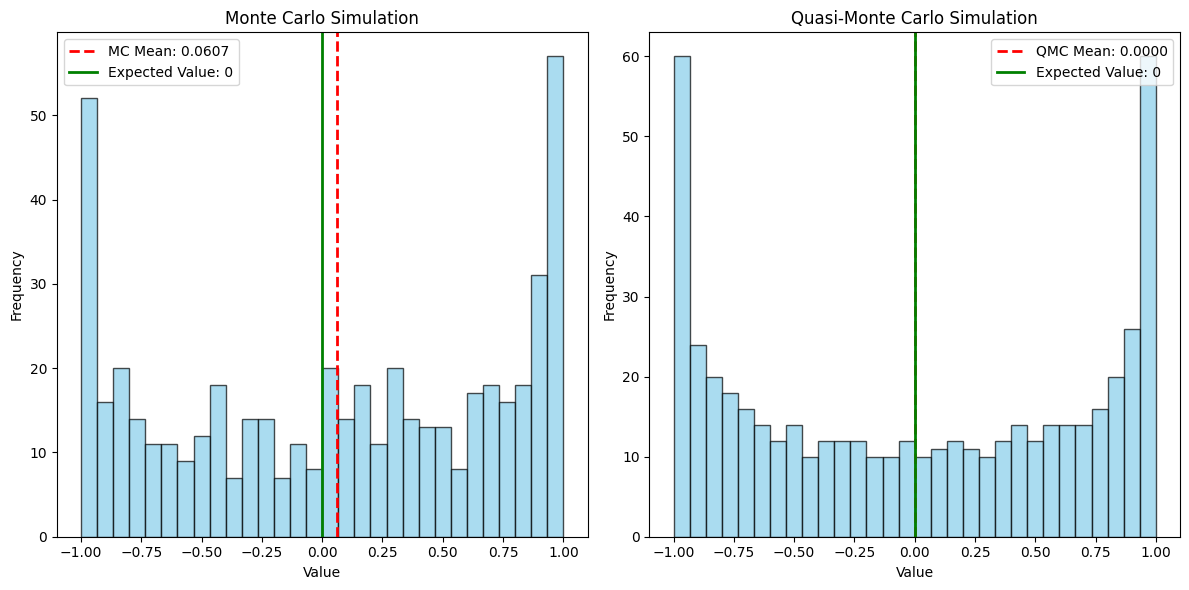

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.qmc import Sobol

# Define the function to integrate
def f(x):
    return np.sin(2 * np.pi * x)

# Number of samples
N = 512

# Monte Carlo simulation
mc_samples = np.random.rand(N) # generate N random samples from a uniform distribution over [0, 1]
mc_values = f(mc_samples) # calculate function values of the generated samples
mc_mean = np.mean(mc_values) # calculate the mean 

# Quasi-Monte Carlo simulation using Sobol sequence
sobol_engine = Sobol(d=1, scramble=True) # initialize the Sobol sequence generator
qmc_samples = sobol_engine.random(N).flatten() # Generate N Sobol sequence samples
qmc_values = f(qmc_samples) # calculate function values of the generated samples
qmc_mean = np.mean(qmc_values)  # calculate the mean 

# Expected value (integral of sin(2*pi*x) over [0, 1])
expected_value = 0

# Plotting
plt.figure(figsize=(12, 6))

# Monte Carlo
plt.subplot(1, 2, 1)
plt.hist(mc_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mc_mean, color='red', linestyle='dashed', linewidth=2, label=f'MC Mean: {mc_mean:.4f}')
plt.axvline(expected_value, color='green', linestyle='solid', linewidth=2, label='Expected Value: 0')
plt.title('Monte Carlo Simulation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Quasi-Monte Carlo
plt.subplot(1, 2, 2)
plt.hist(qmc_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(qmc_mean, color='red', linestyle='dashed', linewidth=2, label=f'QMC Mean: {qmc_mean:.4f}')
plt.axvline(expected_value, color='green', linestyle='solid', linewidth=2, label='Expected Value: 0')
plt.title('Quasi-Monte Carlo Simulation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Print the results
print(f"Monte Carlo mean: {mc_mean}")
print(f"Quasi-Monte Carlo mean: {qmc_mean}")
print(f"Expected mean: {expected_value}")

# Show plot
plt.tight_layout()
plt.show()

---

## Task

1. **Convergence Study**: Compare the convergence of Monte Carlo (MC) and Quasi-Monte Carlo (QMC) methods by evaluating the absolute error as the number of samples $N$ increases. The goal is to demonstrate that QMC converges faster to the expected value compared to MC.

---

## Example Solution

### 1. Convergence Study: MC vs. QMC

To further demonstrate the advantages of QMC, we perform a **convergence study** where we compare the absolute error in MC and QMC methods for different sample sizes $ N $. As the number of samples increases, we expect QMC to converge to the exact value faster than MC. We use the integral of $ \sin(2\pi x) $ as our test case.

#### Results

The plot below shows the absolute error for both MC and QMC methods as a function of the number of samples $ N $. The QMC method demonstrates a faster convergence to the true value compared to MC, especially for smaller sample sizes.

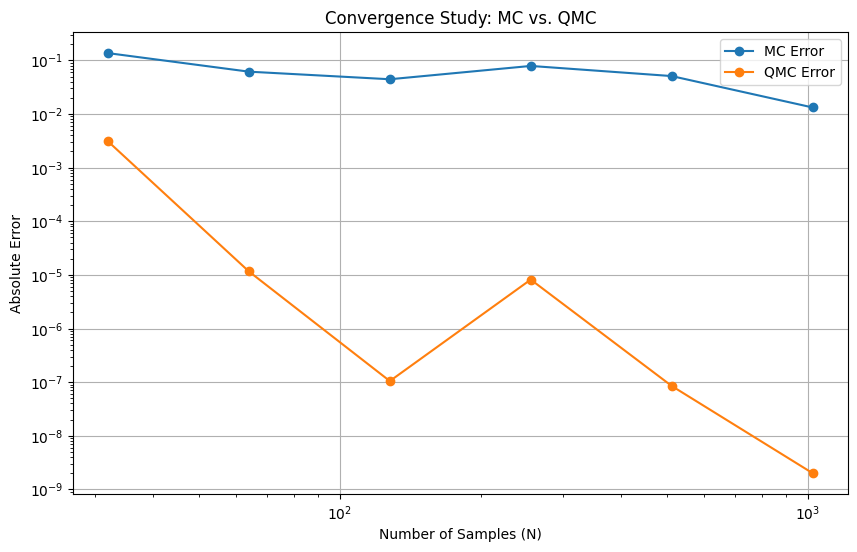

N = 32: MC Mean = -0.1366300503855054, QMC Mean = -0.0030893213001874503, Expected = 0
N = 64: MC Mean = -0.061629733804096594, QMC Mean = 1.159043027838813e-05, Expected = 0
N = 128: MC Mean = -0.04449380471912075, QMC Mean = -1.0474661779613648e-07, Expected = 0
N = 256: MC Mean = -0.07880548271533161, QMC Mean = 8.172007617164578e-06, Expected = 0
N = 512: MC Mean = -0.05101528227346058, QMC Mean = -8.503654067015809e-08, Expected = 0
N = 1024: MC Mean = 0.013255999874766451, QMC Mean = 2.0108040336974664e-09, Expected = 0


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.qmc import Sobol
import umbridge

# Define the function to integrate
def f(x):
    return np.sin(2 * np.pi * x)

# Number of samples to evaluate for the convergence study
N_values = [32, 64, 128, 256, 512, 1024]

# Initialize lists to store results
mc_means = []
qmc_means = []
errors_mc = []
errors_qmc = []
expected_value = 0  # Integral of sin(2*pi*x) over [0, 1]

# Perform convergence study for both MC and QMC methods
for N in N_values:
    # Monte Carlo simulation
    mc_samples = np.random.rand(N)
    mc_values = f(mc_samples)
    mc_mean = np.mean(mc_values)
    mc_means.append(mc_mean)
    errors_mc.append(np.abs(mc_mean - expected_value))

    # Quasi-Monte Carlo simulation using Sobol sequence
    sobol_engine = Sobol(d=1, scramble=True)
    qmc_samples = sobol_engine.random(N).flatten()
    qmc_values = f(qmc_samples)
    qmc_mean = np.mean(qmc_values)
    qmc_means.append(qmc_mean)
    errors_qmc.append(np.abs(qmc_mean - expected_value))

# Plot convergence of MC vs QMC
plt.figure(figsize=(10, 6))
plt.loglog(N_values, errors_mc, label='MC Error', marker='o')
plt.loglog(N_values, errors_qmc, label='QMC Error', marker='o')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Absolute Error')
plt.title('Convergence Study: MC vs. QMC')
plt.legend()
plt.grid(True)
plt.show()

# Print convergence study results
for N, mc_mean, qmc_mean in zip(N_values, mc_means, qmc_means):
    print(f"N = {N}: MC Mean = {mc_mean}, QMC Mean = {qmc_mean}, Expected = {expected_value}")